In [2]:
import numpy as np
import matplotlib.pyplot as plt

# high quality plots
plt.rcParams['figure.dpi'] = 300

### Problem 1

How do trajectories from slightly different starting points diverge?

Use the implementation of the logistic map from the programming lab, and run the simulation with two different starting points $x 0$. In the first simulation, use an initial value for $x 0$ of 0.6 . In the second simulation, use the initial value `x0 + np.finfo(float).eps`, where eps is the smallest distance between two floating point numbers on your machine. Store the two simulations of the logistic map in two arrays -x and x 2 .

When evaluating your implementation, it is very helpful to study the solutions at different values of the nonlinearity parameter a and the initial condition $\mathrm{x}_0$, as during the programming lab.

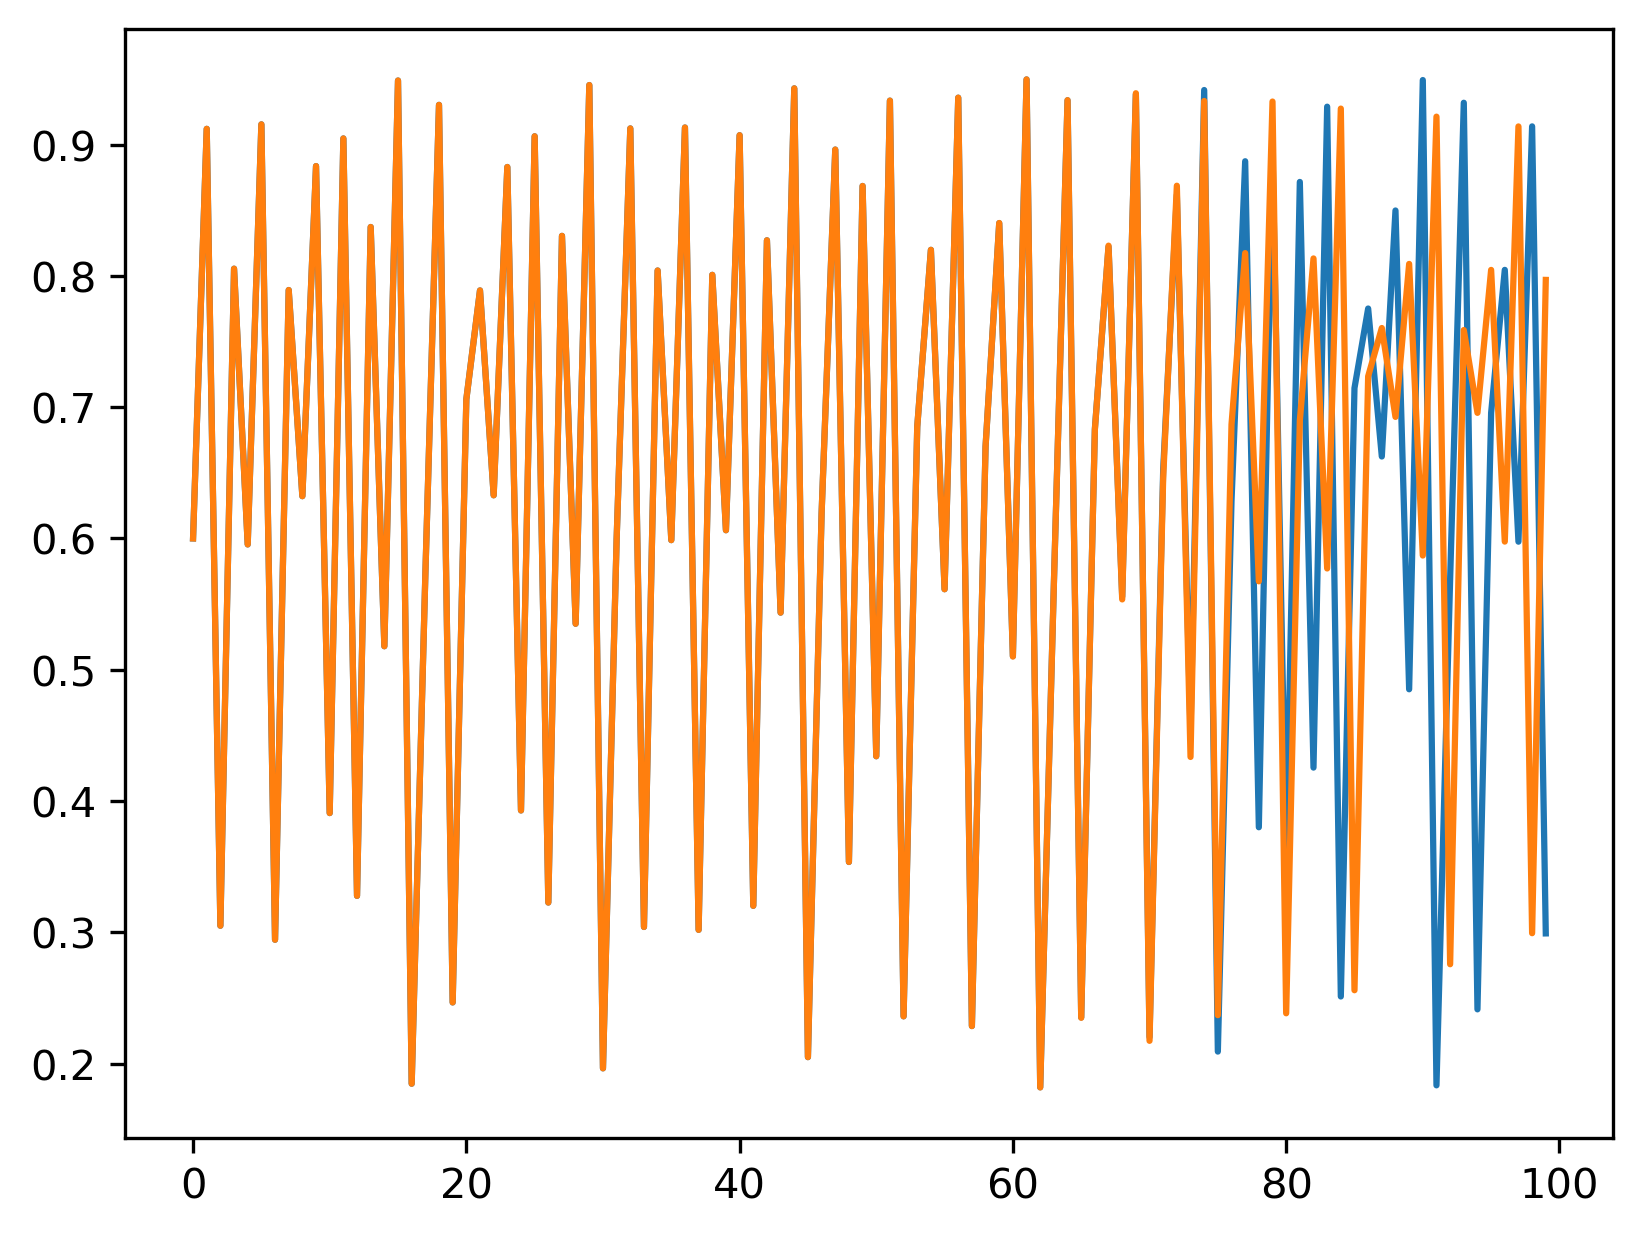

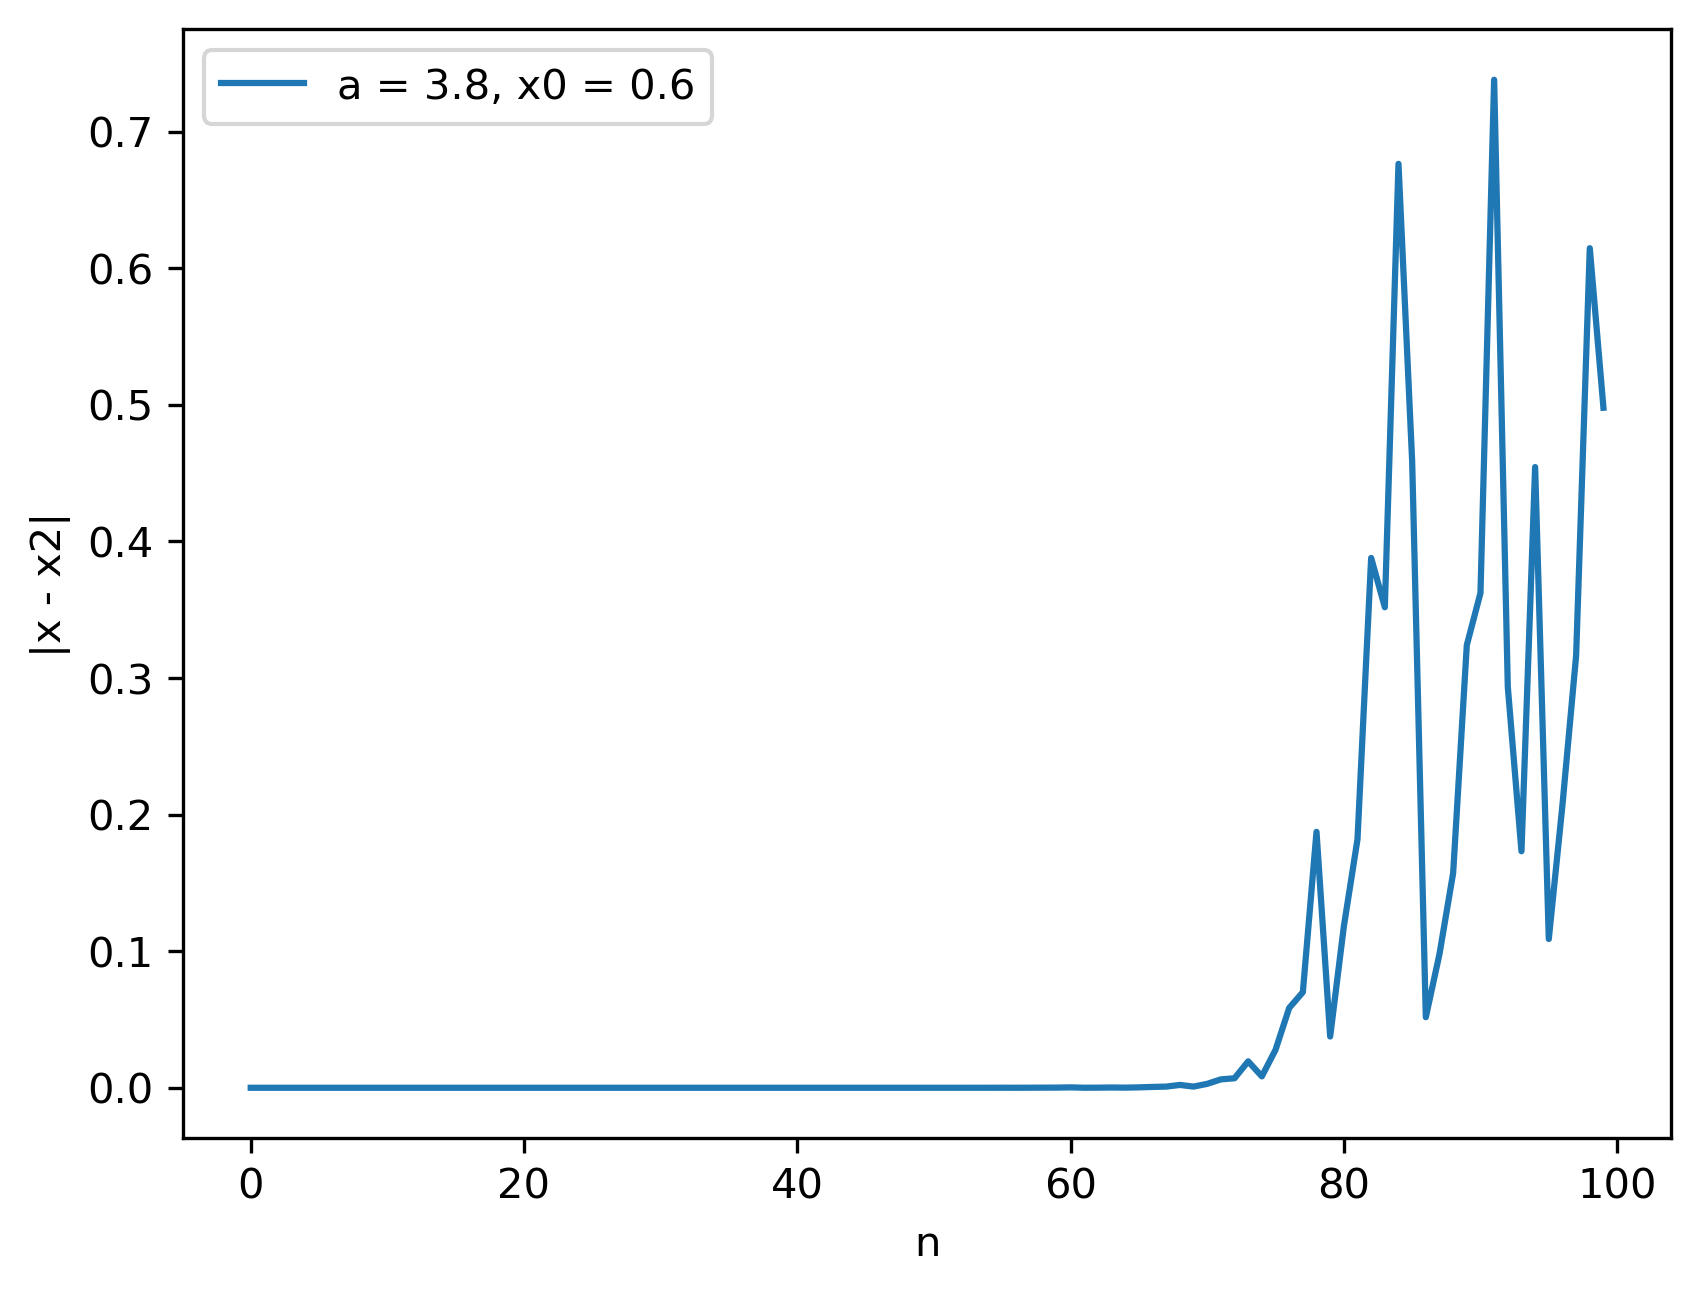

In [8]:
# write the implementation of the function here
def logistic_map(x0, a, N):

    x = np.zeros(N)
    x[0] = x0

    for i in range(1, N):
        x[i] = a * x[i-1] * (1 - x[i-1])

    return x

# compute the two simulations
N = 100
x0 = 0.6
a = 3.8

x = logistic_map(x0, a, N)
x2 = logistic_map(x0 + np.finfo(float).eps, a, N)

# plot the two simulations
plt.figure()
plt.plot(x)
plt.plot(x2)

# plot the difference between the two simulations
plt.figure()
plt.plot(np.abs(x - x2))
plt.xlabel('n')
plt.ylabel('|x - x2|')
plt.legend([f"a = {a}, x0 = {x0}"])

plt.show()

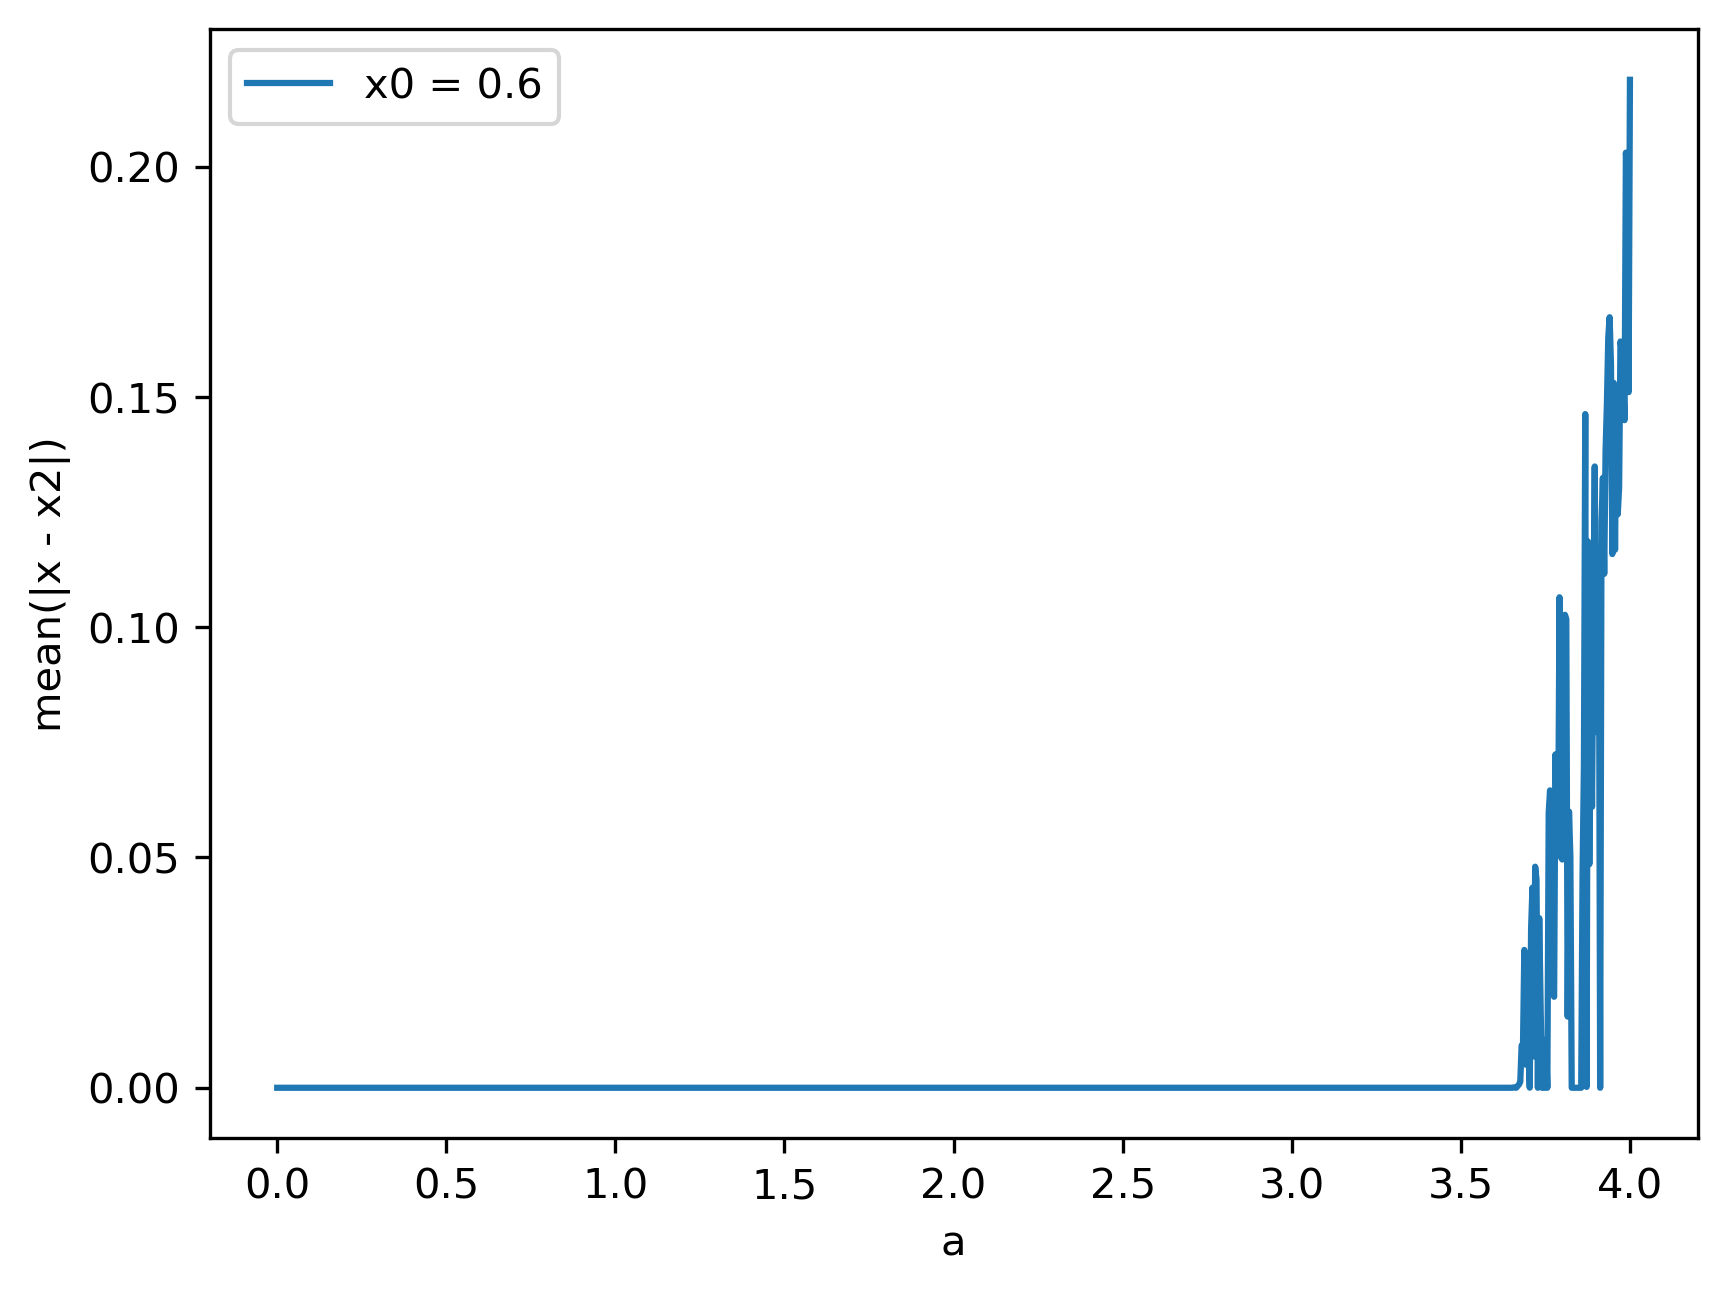

In [76]:
# now let's compute the absolute differences between simulations for a range of a values 
N = 100
x0 = 0.6
a_values = np.linspace(0, 4, 1000)
diffs = np.zeros(len(a_values))

for i, a in enumerate(a_values):
    x = logistic_map(x0, a, N)
    x2 = logistic_map(x0 + np.finfo(float).eps, a, N)
    diffs[i] = np.mean(np.abs(x - x2))

# plot the differences
plt.figure()
plt.plot(a_values, diffs)
plt.xlabel('a')
plt.ylabel('mean(|x - x2|)')
plt.legend([f'x0 = {x0}'])

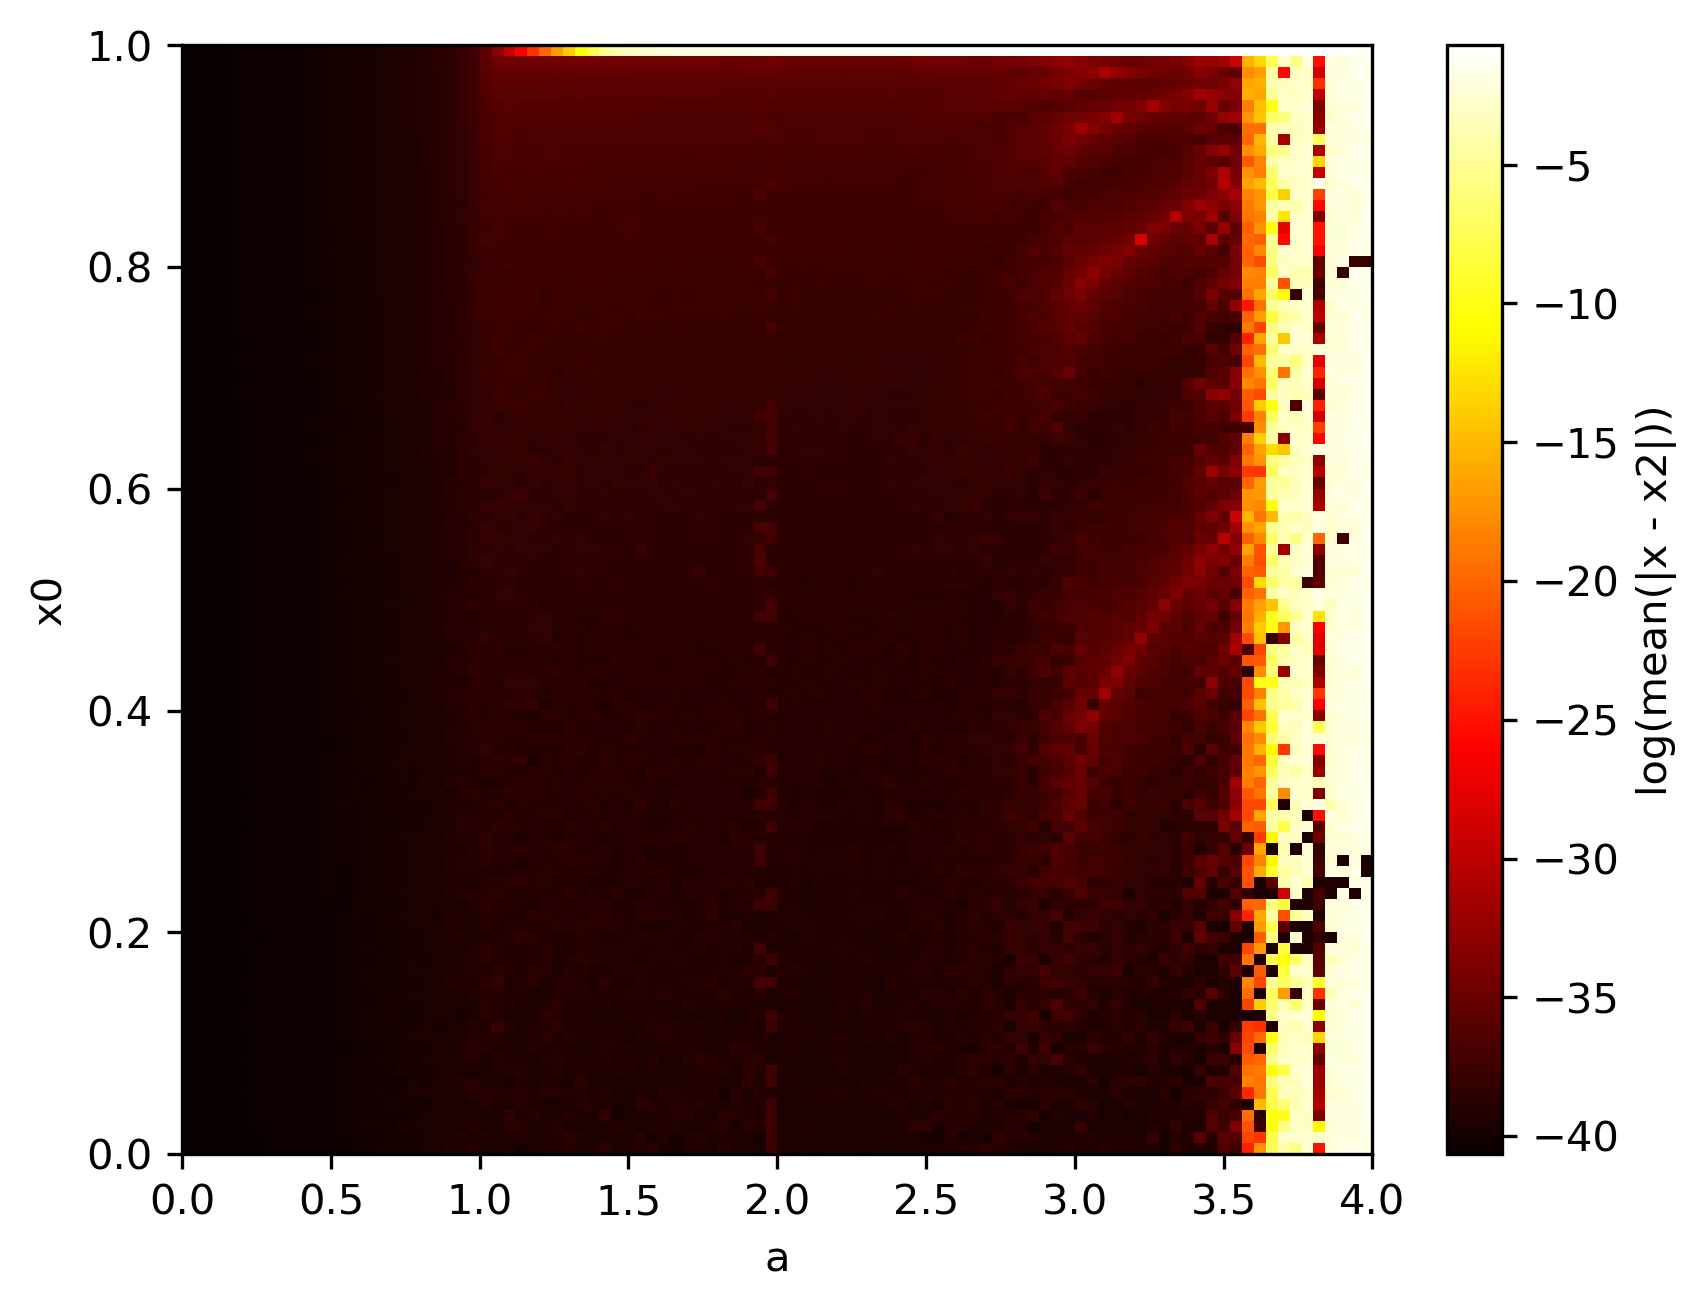

In [20]:
# now let's do the same but for a range of x0 values and a range of a values at the same time to plot a surface
N = 100
x0_values = np.linspace(0, 0.2, 100)
a_values = np.linspace(0, 4, 100)

diffs = np.zeros((len(x0_values), len(a_values)))

for i, x0 in enumerate(x0_values):
    for j, a in enumerate(a_values):
        x = logistic_map(x0, a, N)
        x2 = logistic_map(x0 + np.finfo(float).eps, a, N)
        diffs[i, j] = np.mean(np.abs(x - x2))

# plot the surface
plt.figure()
plt.imshow(np.log(diffs), extent=(0, 4, 0, 1), aspect='auto')
plt.xlabel('a')
plt.ylabel('x0')
plt.colorbar(label='log(mean(|x - x2|))')

plt.set_cmap('hot')

plt.show()


# P1: ALL IN ONE

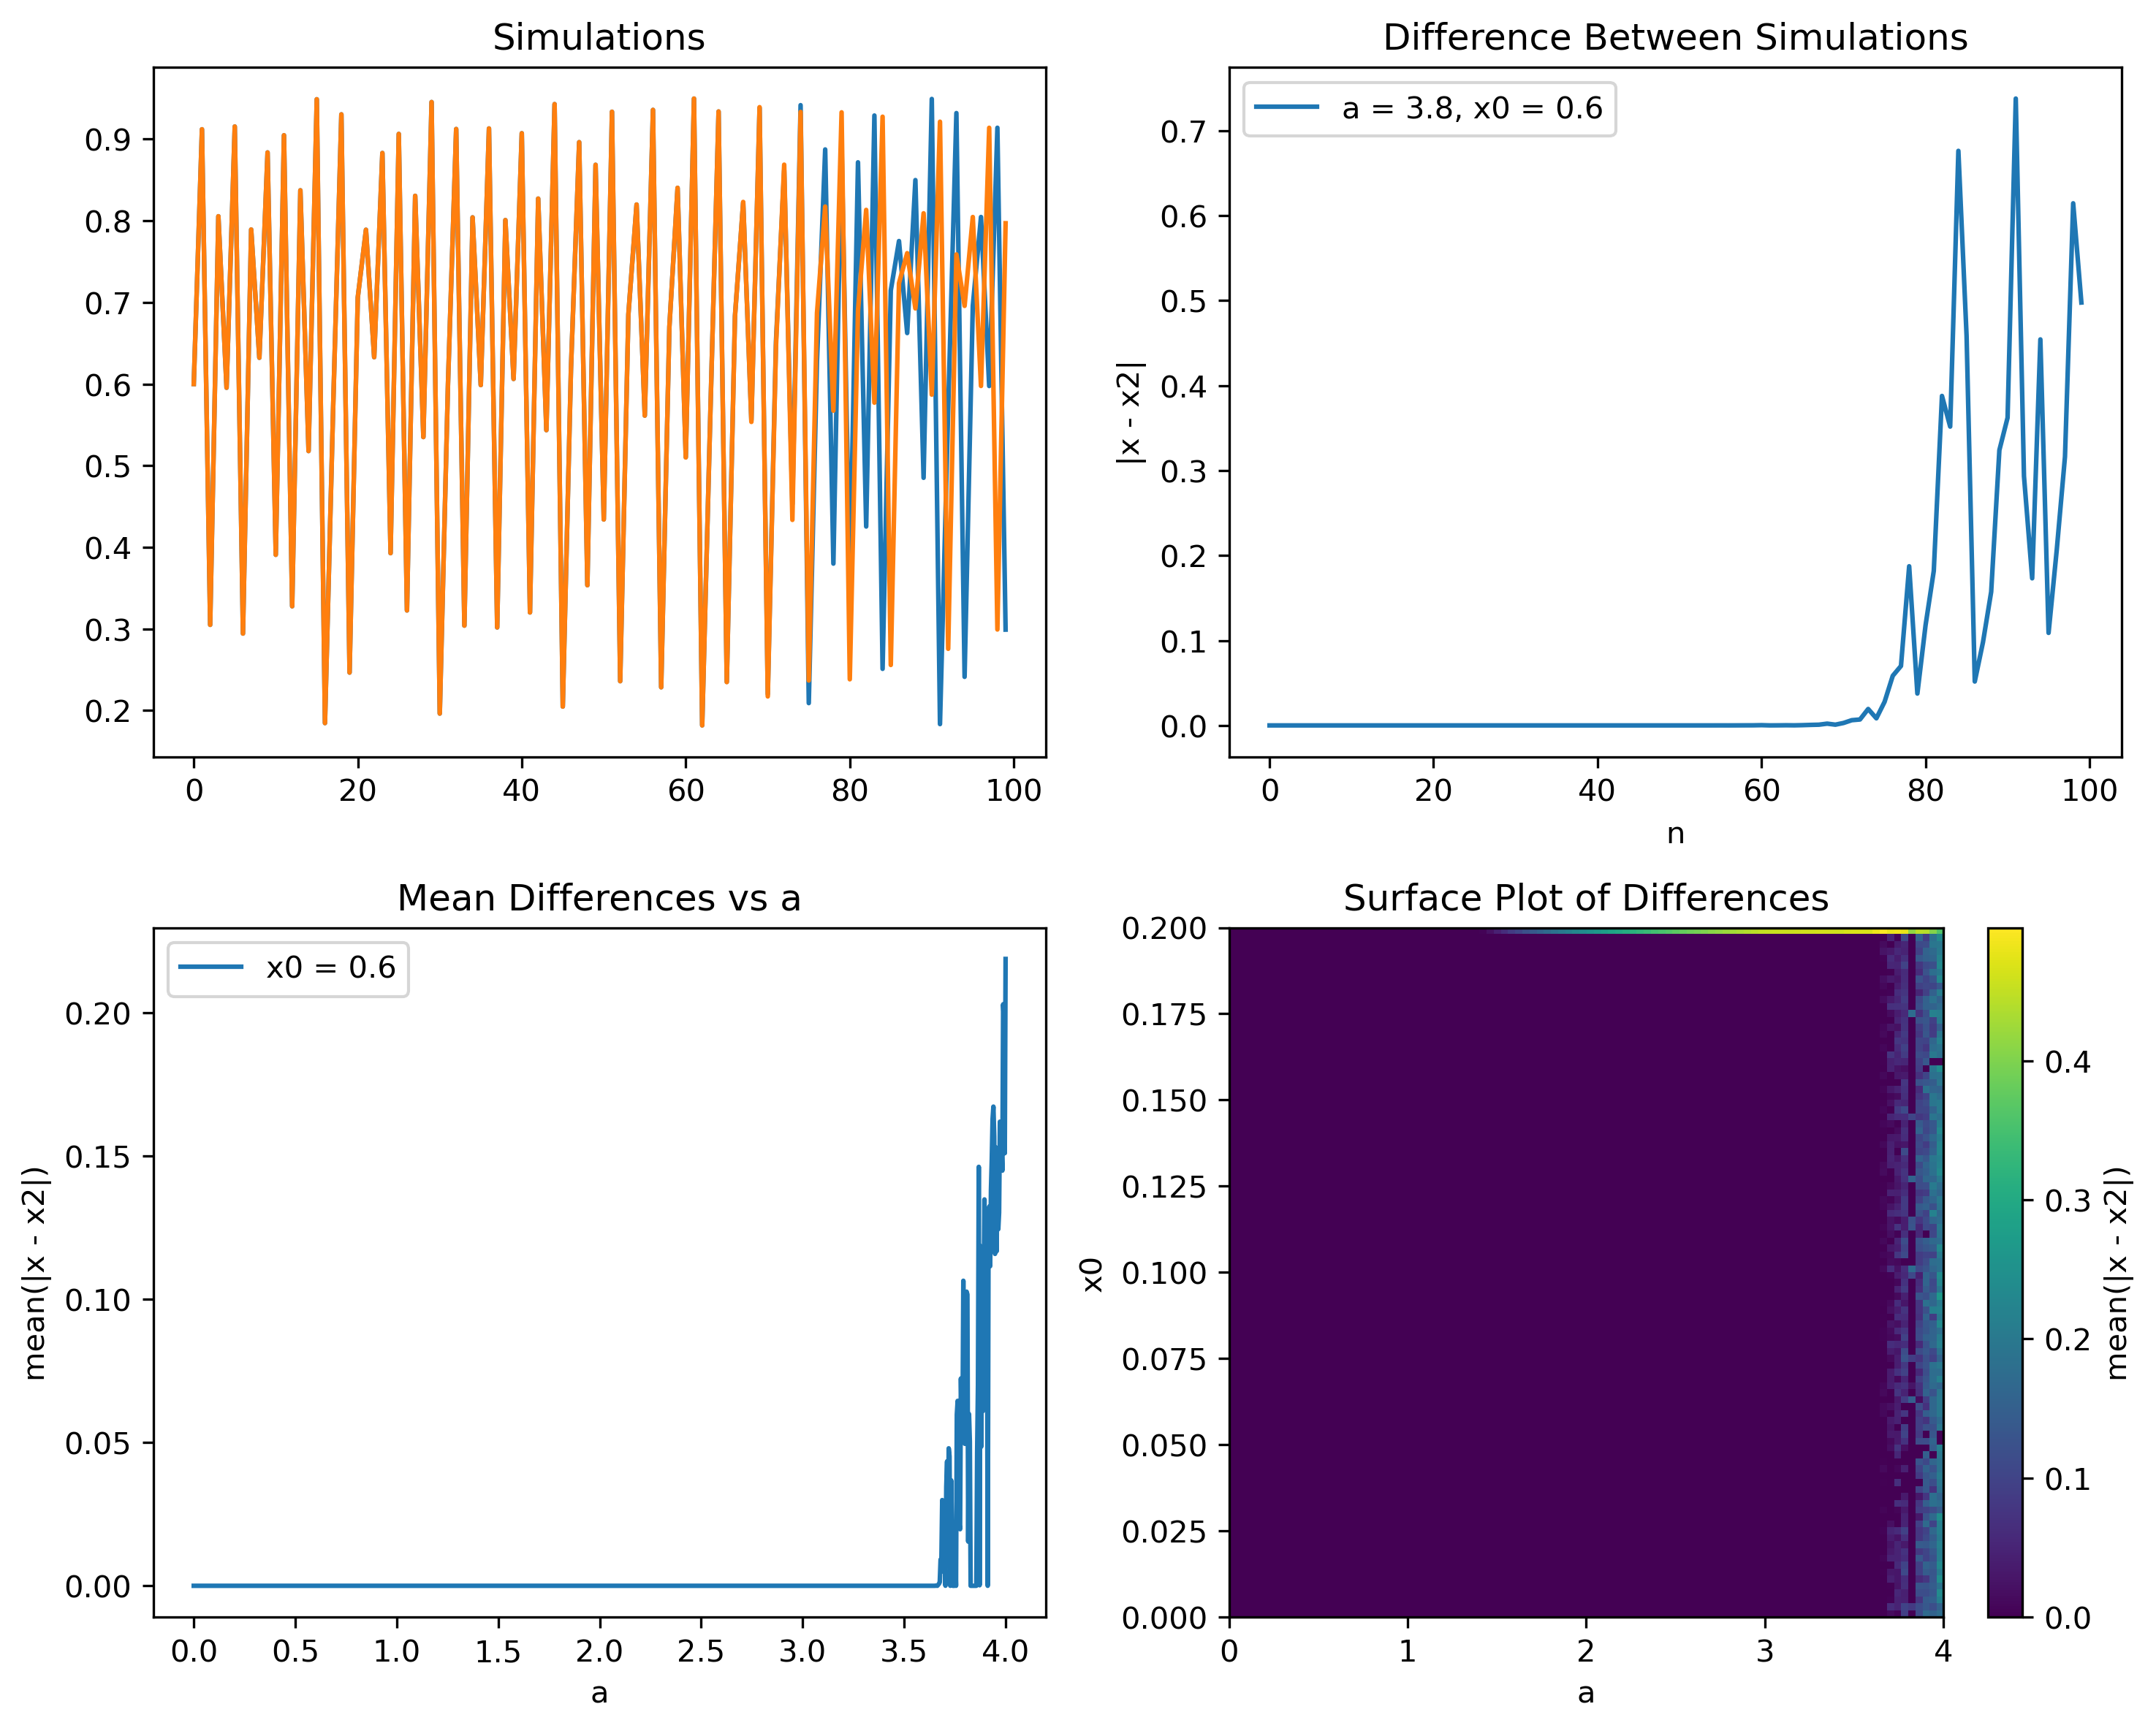

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# write the implementation of the function here
def logistic_map(x0, a, N):
    x = np.zeros(N)
    x[0] = x0

    for i in range(1, N):
        x[i] = a * x[i-1] * (1 - x[i-1])

    return x

# compute the two simulations
N = 100
x0 = 0.6
a = 3.8

x = logistic_map(x0, a, N)
x2 = logistic_map(x0 + np.finfo(float).eps, a, N)

# create a single figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# plot the two simulations
axes[0, 0].plot(x)
axes[0, 0].plot(x2)
axes[0, 0].set_title("Simulations")

# plot the difference between the two simulations
axes[0, 1].plot(np.abs(x - x2))
axes[0, 1].set_xlabel('n')
axes[0, 1].set_ylabel('|x - x2|')
axes[0, 1].legend([f"a = {a}, x0 = {x0}"])
axes[0, 1].set_title("Difference Between Simulations")

# now let's compute the absolute differences between simulations for a range of a values 
a_values = np.linspace(0, 4, 1000)
diffs = np.zeros(len(a_values))

for i, a in enumerate(a_values):
    x = logistic_map(x0, a, N)
    x2 = logistic_map(x0 + np.finfo(float).eps, a, N)
    diffs[i] = np.mean(np.abs(x - x2))

# plot the differences
axes[1, 0].plot(a_values, diffs)
axes[1, 0].set_xlabel('a')
axes[1, 0].set_ylabel('mean(|x - x2|)')
axes[1, 0].legend([f'x0 = {x0}'])
axes[1, 0].set_title("Mean Differences vs a")

# now let's do the same but for a range of x0 values and a range of a values at the same time to plot a surface
x0_values = np.linspace(0, 0.2, 100)
a_values = np.linspace(0, 4, 100)

diffs = np.zeros((len(x0_values), len(a_values)))

for i, x0 in enumerate(x0_values):
    for j, a in enumerate(a_values):
        x = logistic_map(x0, a, N)
        x2 = logistic_map(x0 + np.finfo(float).eps, a, N)
        diffs[i, j] = np.mean(np.abs(x - x2))

# plot the surface
im = axes[1, 1].imshow(diffs, extent=(0, 4, 0, 0.2), aspect='auto')
axes[1, 1].set_xlabel('a')
axes[1, 1].set_ylabel('x0')
fig.colorbar(im, ax=axes[1, 1], label='mean(|x - x2|)')
axes[1, 1].set_title("Surface Plot of Differences")

plt.tight_layout()
plt.show()



### Problem 2

Compare results with analytical solution at $a=4$

The logistic map has an analytical solution for certain values of the parameter $a$ (specifically for $a=4$ ):

$$
x_n=\frac{1}{2}\left[1-\cos \left(2^n \cos ^{-1}\left(1-2 x_0\right)\right)\right]
$$

and remarkably, this represents a solution that is valid within the chaotic regime. Using the numerical implementation of the logistic map (in variable `x`), compare this with the analytical expression above (in variable `x2`).

When evaluating your implementation, be sure to compare the plots between the numerical and analytical solutions.
(Optional) An interesting exercise is to compare the numerical and analytical solutions with a finer time axis for the analytical. How do the two plots compare in this case?

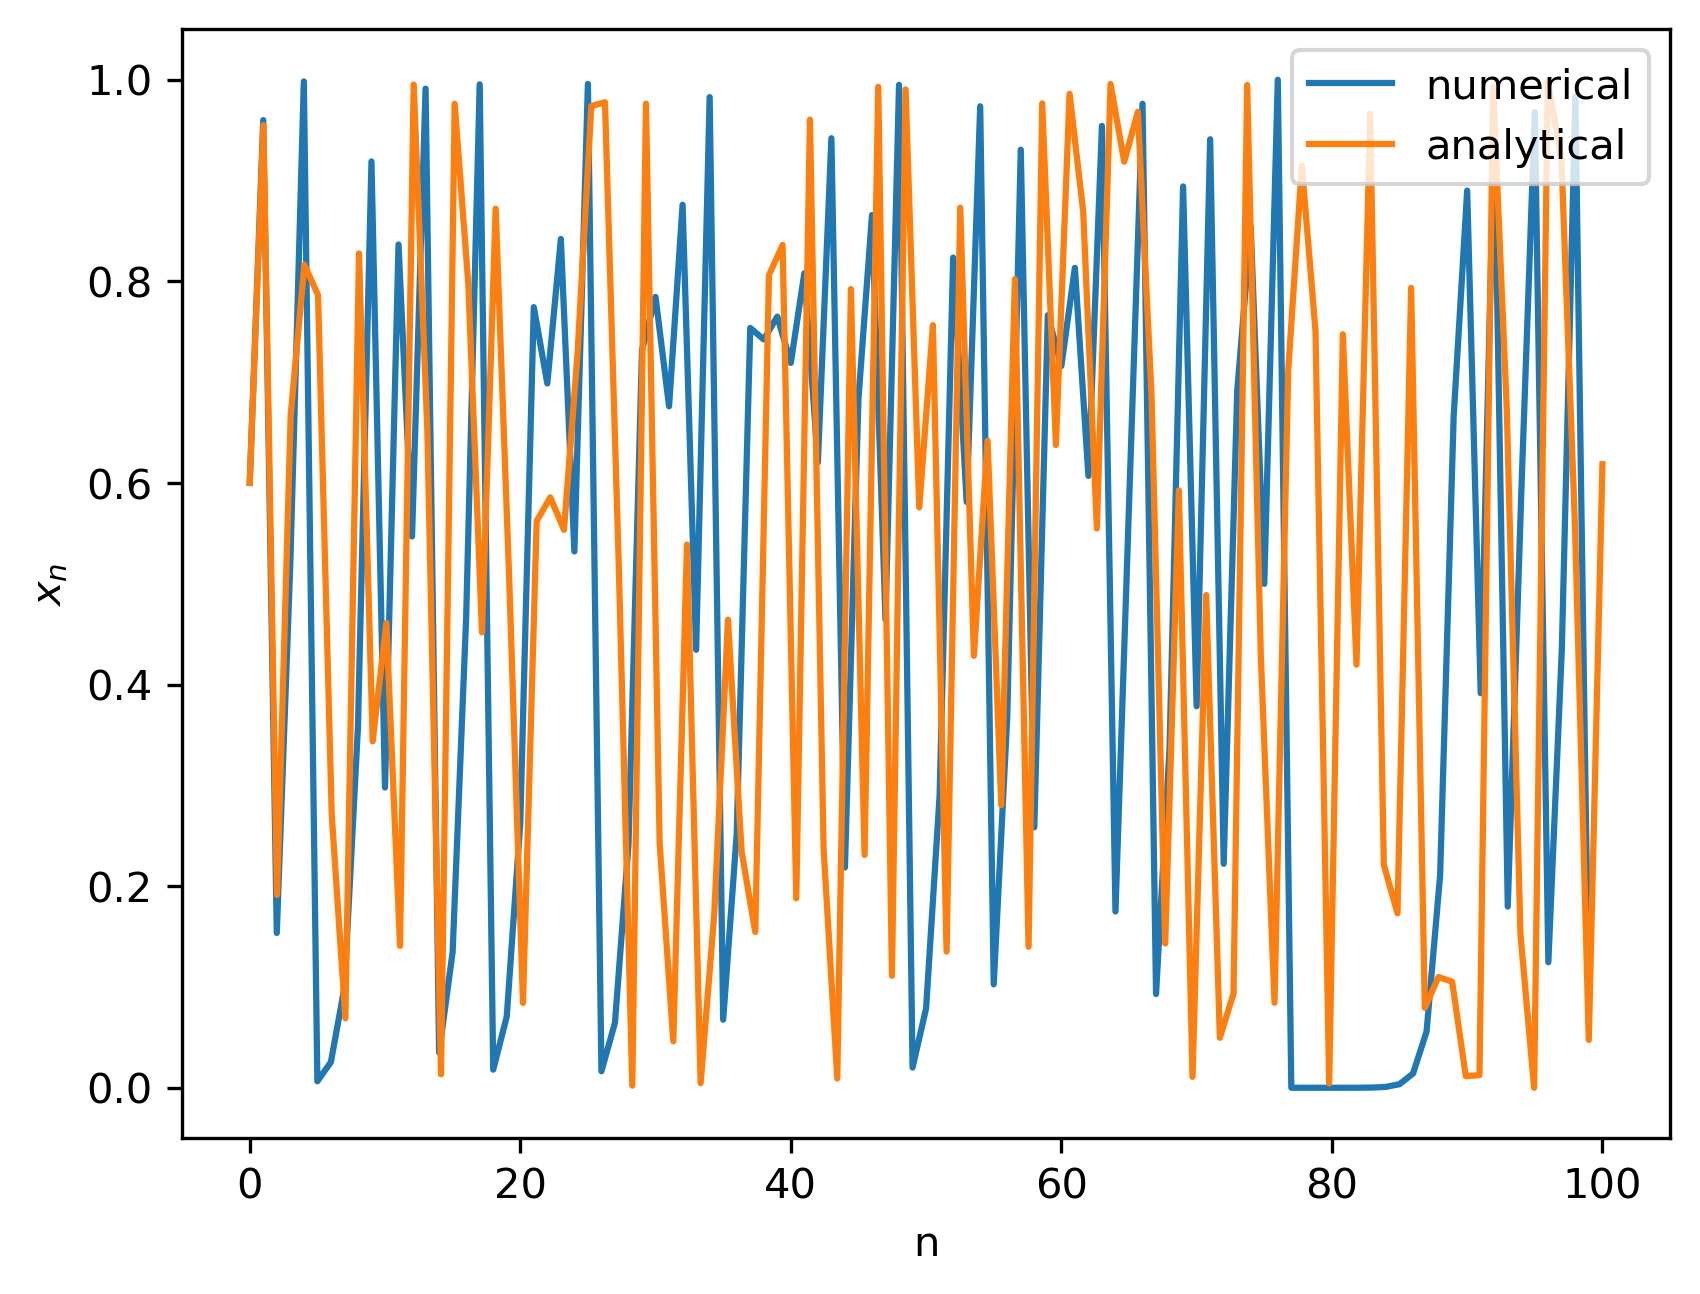

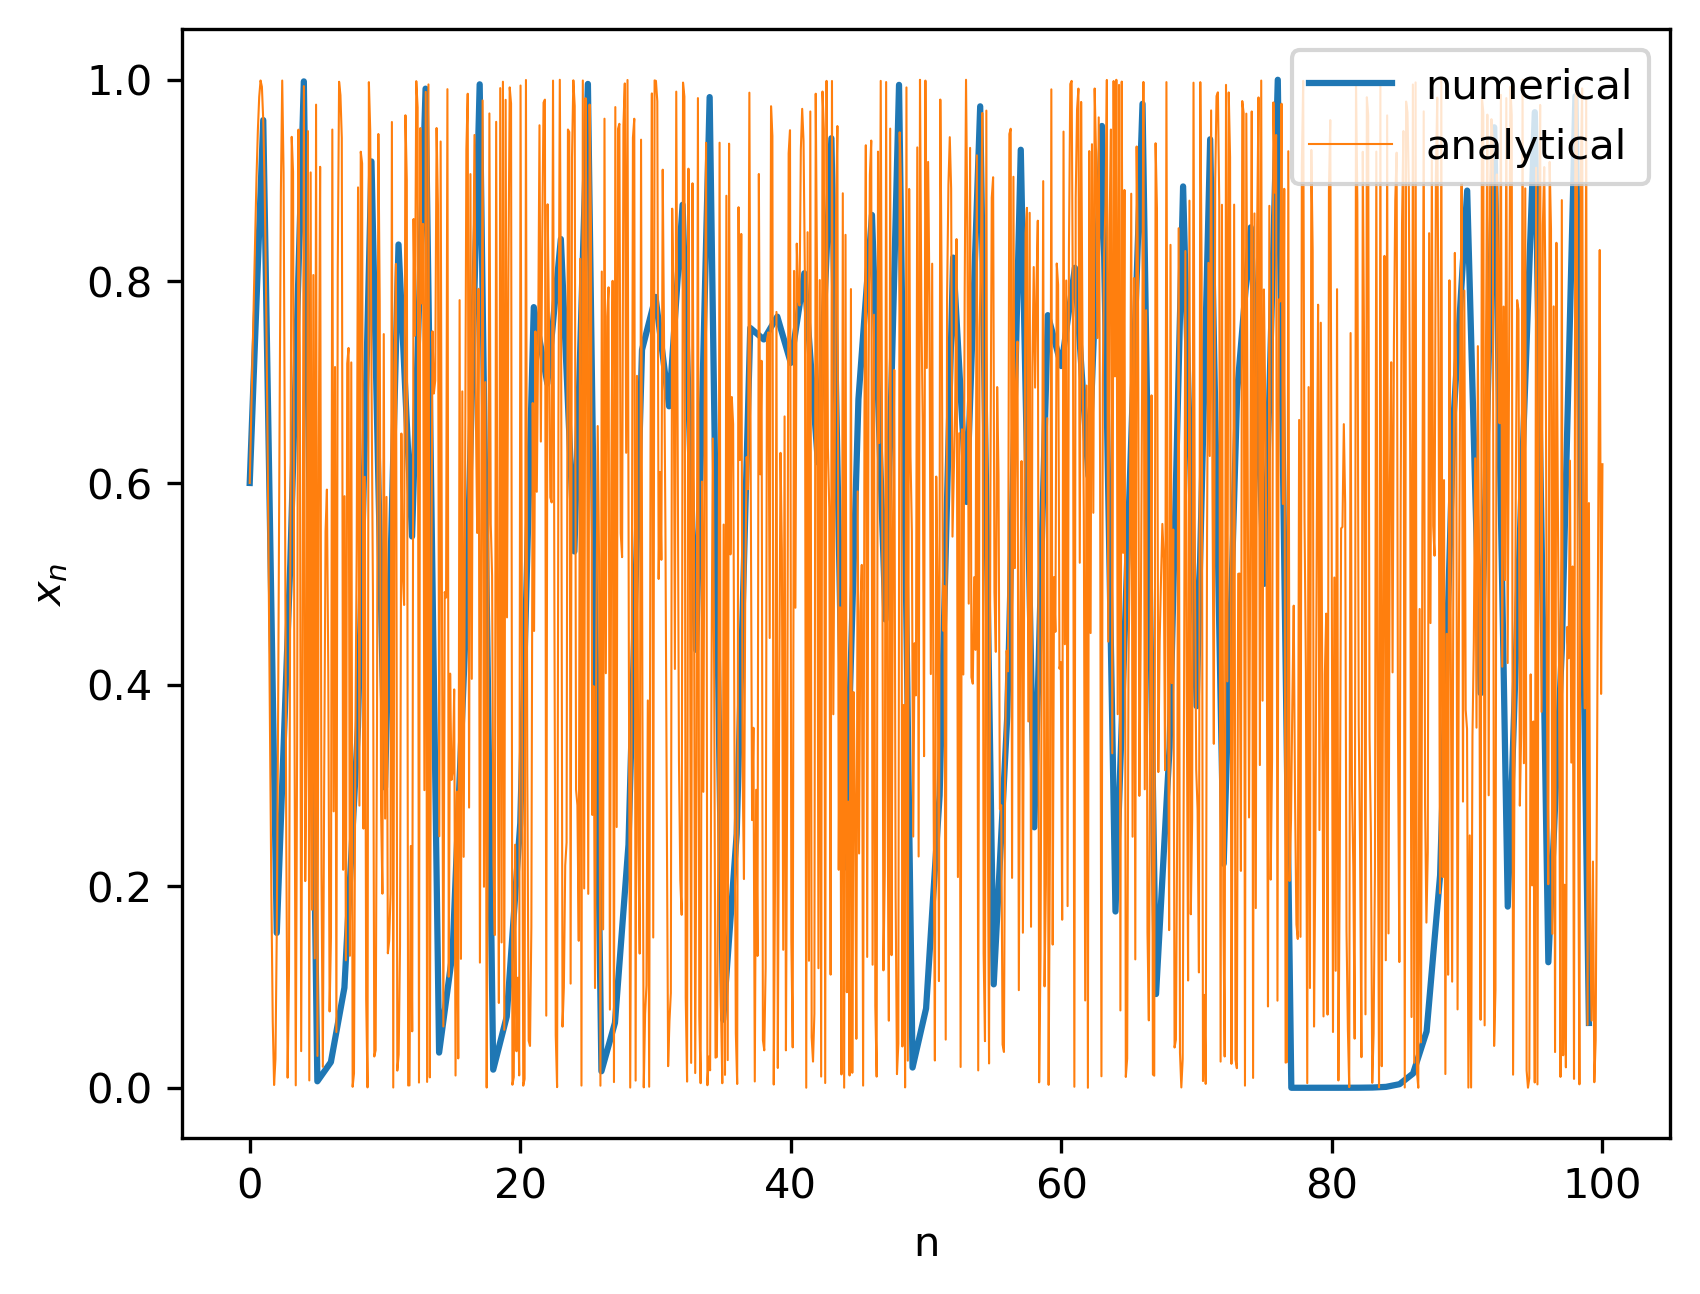

In [106]:
# define function for analytical solution 
def analyticLogisticMap(x0, Nmax, Nsteps=100):

    n = np.linspace(0, Nmax, Nsteps)

    x = (1/2) * (1 - np.cos((2**n) * np.arccos(1 - 2*x0)))

    return x, n

# function for numerical logistic map 
def logistic_map(x0, a, N):

    x = np.zeros(N)
    x[0] = x0

    for i in range(1, N):
        x[i] = a * x[i-1] * (1 - x[i-1])

    return x

# compute numerical and analytical solutions for a = 4.0
N = 100
x0 = 0.6
a = 4.0

x = logistic_map(x0, a, N)
x2, n = analyticLogisticMap(x0, N, N)

# plot the two simulations
plt.figure()
plt.plot(x, label='numerical')
plt.plot(n, x2, label='analytical')
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.legend(loc='upper right')

### SECTION 2: COMPARE FOR A FINER TIME AXIS FOR THE ANALYTICAL SOLUTION
x = logistic_map(x0, a, N)
x2, n = analyticLogisticMap(x0, N, 1000)

# plot the two simulations
plt.figure()
plt.plot(x, label='numerical')
plt.plot(n, x2, lw=0.5, label='analytical')
plt.xlabel('n')
plt.ylabel('$x_n$')
plt.legend(loc='upper right')
plt.show()